In [1]:
%matplotlib inline

### 累計レポート
# 標準ライブラリ
import os
from datetime import datetime, timedelta
from typing import List, Dict, Tuple, Optional, Callable

# サードパーティライブラリ
import pandas as pd
from pandas import Timedelta
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
from IPython.display import Markdown, display

# プロジェクト内モジュール
from gamedata import hard_sales as hs
from gamedata import plot_hard as ph
from gamedata import hard_info as hi
from gamedata import hard_event as he
from gamedata import chart_hard as ch


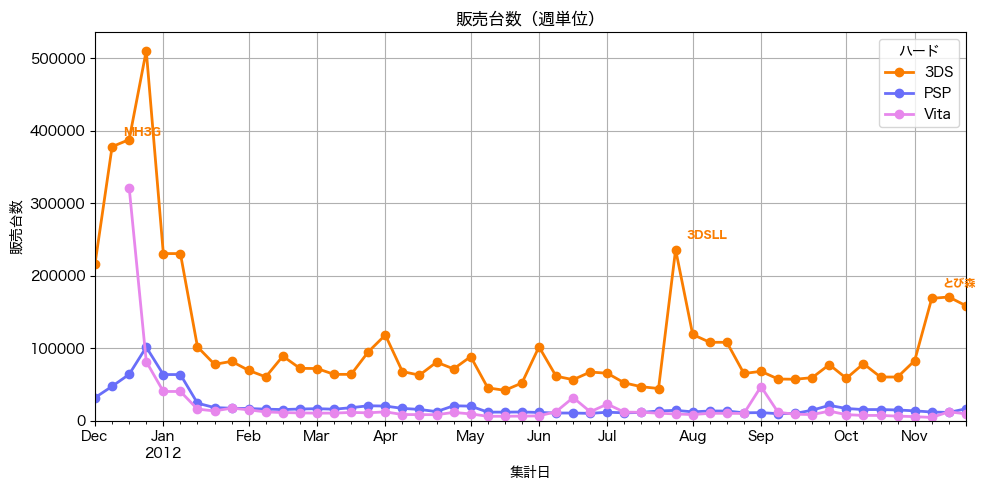

In [10]:

report_event_mask = he.EventMasks(hard=1.5, price=3, sale=2, soft=3, event=2)
(fig, df) = ph.plot_sales(hw=['Vita', '3DS', 'PSP'], begin=datetime(2011, 12, 1), end=datetime(2012,11,30), event_mask=report_event_mask)

In [11]:
df.head(30)

hw,3DS,PSP,Vita
report_date,,,
2011-12-04,216350.0,31560.0,NaN
2011-12-11,378114.0,47238.0,NaN
2011-12-18,387838.0,63792.0,321407.0
2011-12-25,510629.0,101370.0,81387.0
2012-01-01,230491.0,63468.0,40106.0
2012-01-08,230491.0,63469.0,40107.0
2012-01-15,101697.0,23942.0,15737.0
2012-01-22,77519.0,17874.0,13221.0
2012-01-29,81699.0,16939.0,17106.0
